# Importation des librairies

In [6]:
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.decomposition import PCA

import importlib
spec = importlib.util.spec_from_file_location("preprocessing", "..\\utils\\preprocessing.py")
preprocessing = importlib.util.module_from_spec(spec)
spec.loader.exec_module(preprocessing)

spec = importlib.util.spec_from_file_location("fspliter", "..\\utils\\files_spliter.py")
fspliter = importlib.util.module_from_spec(spec)
spec.loader.exec_module(fspliter)

spec = importlib.util.spec_from_file_location("results", "..\\utils\\results.py")
results = importlib.util.module_from_spec(spec)
spec.loader.exec_module(results)

# Lecture des données et preprocessing

In [3]:
data = fspliter.get_mice(0)
data = fspliter.retrieve_day(data, 3)
data = preprocessing.clean_missing_values(data)
data = preprocessing.remove_outliers(data)

# Séparation en sets d'entrainement et de test

In [7]:
pca = PCA(n_components=50)
train, test = train_test_split(data, test_size=0.2, random_state=42)

#remove filename columns
train = train.drop(['filename'], axis=1)
test = test.drop(['filename'], axis=1)

In [8]:
#state column as label and the others as features
train_features = train.drop(['state'], axis=1)
train_labels = train['state']
pca.fit(train_features)
train_features = pca.transform(train_features)

test_features = test.drop(['state'], axis=1)
test_labels = test['state']
test_features = pca.transform(test_features)
print(train_features.shape)

(16907, 50)


# Models

In [9]:
clf = svm.SVC()
clf.fit(train_features, train_labels)
predict = clf.predict(test_features)

# Résultats

Rapport de classification : 
              precision    recall  f1-score   support

           n       0.89      0.89      0.89      1397
           w       0.76      0.32      0.45       263
           r       0.90      0.95      0.93      2567

    accuracy                           0.89      4227
   macro avg       0.85      0.72      0.76      4227
weighted avg       0.89      0.89      0.88      4227

Coefficient de cohen's kappa : 0.7858891543322896
Matrice de confusion :


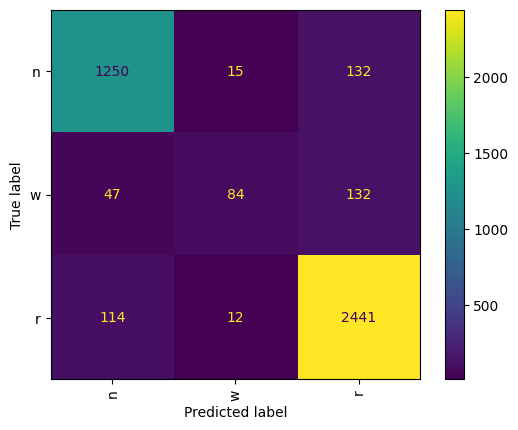

In [10]:
results.scores(test_labels, predict, data.state.unique())